In [ ]:
pip install haystack-ai trafilatura

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.5/351.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.8/837.8 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [ ]:
pip install pinecone-haystack


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 9.2 MB/s eta 0:00:00


In [ ]:
pip install "sentence-transformers>=3.0.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
# from haystack_integrations.document_stores.pinecone import PineconeDocumentStore

# # Make sure you have the PINECONE_API_KEY environment variable set
# document_store = PineconeDocumentStore(
#   index="YOUR_INDEX_NAME",
#   metric="cosine",
#   dimension=768,
#   spec={"serverless": {"region": "us-east-1", "cloud": "aws"}},
#   )


KeyboardInterrupt: 

In [ ]:
#from haystack.utils import Secret
from haystack.components.embedders import SentenceTransformersTextEmbedder
from haystack.components.builders import PromptBuilder
from haystack.components.generators import OpenAIGenerator
from haystack_integrations.document_stores.pinecone import PineconeDocumentStore
from haystack_integrations.components.retrievers.pinecone import PineconeEmbeddingRetriever
from haystack.components.embedders import OpenAITextEmbedder, OpenAIDocumentEmbedder
from haystack import Pipeline
import os
os.environ["PINECONE_API_KEY"]="your_key_here"
document_store = PineconeDocumentStore(
  index="index_name",
  metric="cosine",
  dimension=1536, #your vector dimensions
  spec={"serverless": {"region": "us-east-1", "cloud": "aws"}},
  )



In [ ]:
prompt_template = """Answer the following query based on the provided context. If the context does
                     not include an answer, reply with 'I don't know'.\n
                     Query: {{query}}
                     Documents:
                     {% for doc in documents %}
                        {{ doc.content }}
                     {% endfor %}
                     Answer:
                  """




In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "Your_api_key_here"
query_pipeline = Pipeline()
#query_pipeline.add_component("text_embedder", SentenceTransformersTextEmbedder()) #either you can use this or OpenAI below
query_pipeline.add_component("text_embedder", OpenAITextEmbedder(model="text-embedding-3-small"))
query_pipeline.add_component("retriever", PineconeEmbeddingRetriever(document_store=document_store))
query_pipeline.add_component("prompt_builder", PromptBuilder(template=prompt_template))
query_pipeline.add_component("generator", OpenAIGenerator(model="gpt-4"))
query_pipeline.connect("text_embedder.embedding", "retriever.query_embedding")
query_pipeline.connect("retriever.documents", "prompt_builder.documents")
query_pipeline.connect("prompt_builder", "generator")

query = "What is Karmayoga?"
results = query_pipeline.run(
    {
        "text_embedder": {"text": query},
        "prompt_builder": {"query": query},
    }
)

In [ ]:
print (results)

{'text_embedder': {'meta': {'model': 'text-embedding-3-small', 'usage': {'prompt_tokens': 7, 'total_tokens': 7}}}, 'generator': {'replies': ["I don't know."], 'meta': [{'model': 'gpt-4-0613', 'index': 0, 'finish_reason': 'stop', 'usage': {'completion_tokens': 5, 'prompt_tokens': 54, 'total_tokens': 59}}]}}


In [ ]:
print(results['generator']['replies'])

["I don't know."]


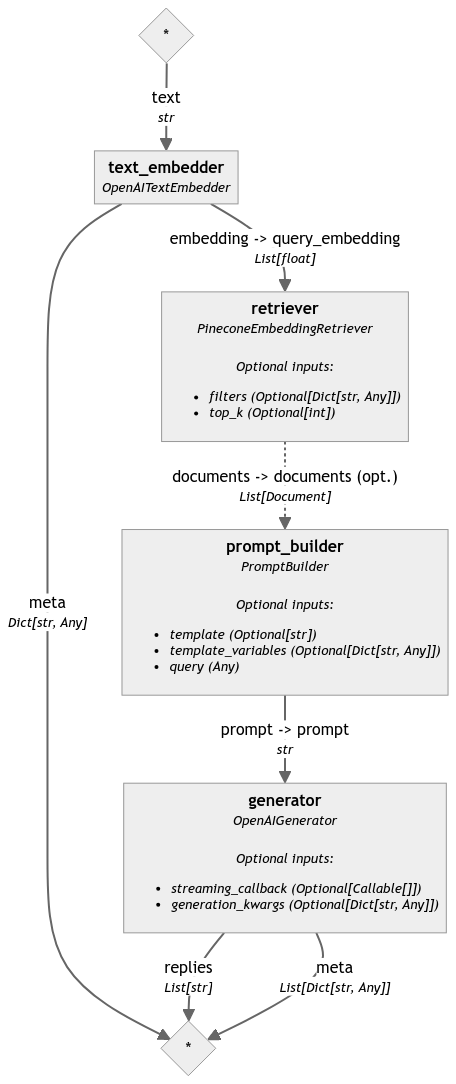

In [ ]:
query_pipeline.show()

In [ ]:
query = "What is the advice of Swami Chidananda to Westerners?"
results = query_pipeline.run(
    {
        "text_embedder": {"text": query},
        "prompt_builder": {"query": query},
    }
)
print (results)

{'text_embedder': {'meta': {'model': 'text-embedding-3-small', 'usage': {'prompt_tokens': 14, 'total_tokens': 14}}}, 'generator': {'replies': ["I don't know."], 'meta': [{'model': 'gpt-4-0613', 'index': 0, 'finish_reason': 'stop', 'usage': {'completion_tokens': 5, 'prompt_tokens': 61, 'total_tokens': 66}}]}}


In [ ]:
query = "What are the three gunas as in Gita?"
results = query_pipeline.run(
    {
        "text_embedder": {"text": query},
        "prompt_builder": {"query": query},
    }
)
print (results)

{'text_embedder': {'meta': {'model': 'text-embedding-3-small', 'usage': {'prompt_tokens': 11, 'total_tokens': 11}}}, 'generator': {'replies': ["I don't know."], 'meta': [{'model': 'gpt-4-0613', 'index': 0, 'finish_reason': 'stop', 'usage': {'completion_tokens': 5, 'prompt_tokens': 58, 'total_tokens': 63}}]}}
